In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_lvl1 = pd.read_csv('level_1.csv')

In [3]:
df_lvl1.head()

,Unnamed: 0,count
0,EPG,1746039
1,Одежда и обувь,399531
2,Книги и цифровые книги,106999


In [4]:
df_lvl2 = pd.read_csv('level_2.csv')

In [5]:
df_lvl2.head()

,Unnamed: 0,count
0,Дом и сад,214851
1,Одежда,200703
2,Обувь,198828
3,Строительство и ремонт,198109
4,Автотовары,182467


In [6]:
df_attr = pd.read_parquet('attributes.parquet')
df_attr.head()

,variantid,categories,characteristic_attributes_mapping
0,47920382,"{""1"": ""EPG"", ""2"": ""Детские товары"", ""3"": ""Игру...","{""Цвет товара"": [""бежевый"", ""светло-розовый""],..."
1,49801845,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Количество в упаковке, шт"": [""1""], ""Бренд"": ..."
2,49853444,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Бренд"": [""Vervaco""], ""Тип"": [""Набор для выши..."
3,49893028,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Цвет товара"": [""серый""], ""Ширина, см"": [""0.8..."
4,49987483,"{""1"": ""EPG"", ""2"": ""Хобби и творчество"", ""3"": ""...","{""Цвет товара"": [""разноцветный""], ""Название цв..."


In [30]:
df_attr['characteristic_attributes_mapping'].iloc[0]

{'Цвет товара': ['бежевый', 'светло-розовый'],
 'Пол ребенка': ['Унисекс'],
 'Бренд': ['Funny Ducks'],
 'Тип': ['Игрушка для ванной'],
 'Страна-изготовитель': ['Китай'],
 'Развитие навыков': ['Воображение', 'Кругозор', 'Моторика'],
 'Код ТРУ': ['320000000.03051400500000000000'],
 'Минимальный возраст ребенка': ['От 3 лет'],
 'Материал': ['ПВХ пластизоль'],
 'Вес товара, г': ['50'],
 'Максимальный возраст ребенка': ['До 18 лет']}

In [7]:
df_attr.shape

(2252569, 3)

In [8]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252569 entries, 0 to 2252568
Data columns (total 3 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   variantid                          int64 
 1   categories                         object
 2   characteristic_attributes_mapping  object
dtypes: int64(1), object(2)
memory usage: 51.6+ MB


In [9]:
import json

In [10]:
df_attr['categories'] = df_attr['categories'].apply(json.loads)

In [11]:
df_attr['categories'].apply(len).max()

4

In [12]:
df_attr['categories'].apply(len).min()

4

In [13]:
df_attr['cat_1'] = df_attr['categories'].apply(lambda x: x["1"])
df_attr['cat_2'] = df_attr['categories'].apply(lambda x: x["2"])
df_attr['cat_3'] = df_attr['categories'].apply(lambda x: x["3"])
df_attr['cat_4'] = df_attr['categories'].apply(lambda x: x["4"])

In [14]:
df_attr.head()

,variantid,categories,characteristic_attributes_mapping,cat_1,cat_2,cat_3,cat_4
0,47920382,"{'1': 'EPG', '2': 'Детские товары', '3': 'Игру...","{""Цвет товара"": [""бежевый"", ""светло-розовый""],...",EPG,Детские товары,Игрушки,Игрушка для ванной
1,49801845,"{'1': 'EPG', '2': 'Хобби и творчество', '3': '...","{""Количество в упаковке, шт"": [""1""], ""Бренд"": ...",EPG,Хобби и творчество,Материал для рукоделия,"Стеклярус, бусины, стразы"
2,49853444,"{'1': 'EPG', '2': 'Хобби и творчество', '3': '...","{""Бренд"": [""Vervaco""], ""Тип"": [""Набор для выши...",EPG,Хобби и творчество,"Набор для рукоделия, творчества",Набор для вышивания
3,49893028,"{'1': 'EPG', '2': 'Хобби и творчество', '3': '...","{""Цвет товара"": [""серый""], ""Ширина, см"": [""0.8...",EPG,Хобби и творчество,"Нитки, пряжа","Тесьма, кружево, лента, резинка"
4,49987483,"{'1': 'EPG', '2': 'Хобби и творчество', '3': '...","{""Цвет товара"": [""разноцветный""], ""Название цв...",EPG,Хобби и творчество,Настольные и карточные игры,Настольная игра


In [15]:
df_attr['characteristic_attributes_mapping'] = df_attr['characteristic_attributes_mapping'].apply(json.loads)

In [16]:
df_attr['color'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Цвет товара"] if "Цвет товара" in x else None)

In [17]:
df_attr['color'].value_counts()

color
[черный]                                                                      234702
[белый]                                                                       175803
[разноцветный]                                                                105328
[серый]                                                                        61015
[бежевый]                                                                      52624
                                                                               ...  
[коричнево-красный, малиновый, темно-бежевый, темно-серый, черный матовый]         1
[белый, зеленый, коричневый, оливковый, черный]                                    1
[зеленый, золотой, прозрачный, розовый]                                            1
[коричнево-красный, серый, темно-бордовый]                                         1
[горчичный, салатовый, синий, темно-зеленый, фиолетовый]                           1
Name: count, Length: 12957, dtype: int64

In [ ]:
#Найдем самые часто встречающиеся цвета

In [18]:
from collections import Counter
a = []
for i in df_attr['color'].values:
    if i is not None: a.extend(i)
print(Counter(a))

Counter({'черный': 310885, 'белый': 236145, 'разноцветный': 105368, 'серый': 90627, 'бежевый': 74874, 'синий': 70428, 'красный': 59760, 'коричневый': 59057, 'зеленый': 55199, 'серебристый': 51910, 'розовый': 49695, 'желтый': 38718, 'голубой': 35027, 'золотой': 32021, 'прозрачный': 29507, 'оранжевый': 23583, 'фиолетовый': 21247, 'темно-синий': 20196, 'темно-серый': 18929, 'черный матовый': 15751, 'светло-серый': 15251, 'хром': 15248, 'хаки': 13471, 'серый металлик': 12951, 'светло-бежевый': 12784, 'бирюзовый': 11095, 'черно-серый': 10894, 'бордовый': 10659, 'светло-коричневый': 10489, 'темно-коричневый': 9526, 'бронза': 8020, 'темно-зеленый': 7906, 'кремовый': 7851, 'сиреневый': 7592, 'светло-зеленый': 7377, 'светло-розовый': 7326, 'светло-синий': 5948, 'коричнево-красный': 5472, 'салатовый': 4982, 'лазурный': 4792, 'темно-бежевый': 4435, 'оливковый': 4413, 'шоколадный': 4251, 'светло-желтый': 3691, 'слоновая кость': 3630, 'пурпурный': 3456, 'горчичный': 3138, 'коралловый': 3072, 'малин

In [76]:
d = Counter(a).items()
d = sorted(d, key=lambda x: -x[1])
d[:10]

[('черный', 310885),
 ('белый', 236145),
 ('разноцветный', 105368),
 ('серый', 90627),
 ('бежевый', 74874),
 ('синий', 70428),
 ('красный', 59760),
 ('коричневый', 59057),
 ('зеленый', 55199),
 ('серебристый', 51910)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'черный'),
  Text(1, 0, 'белый'),
  Text(2, 0, 'разноцветный'),
  Text(3, 0, 'серый'),
  Text(4, 0, 'бежевый'),
  Text(5, 0, 'синий'),
  Text(6, 0, 'красный'),
  Text(7, 0, 'коричневый'),
  Text(8, 0, 'зеленый'),
  Text(9, 0, 'серебристый')])

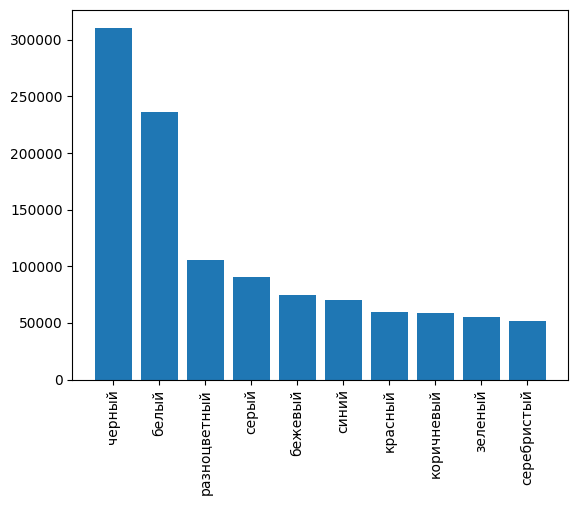

In [80]:
plt.bar(list(map(lambda x: x[0], d[:10])), list(map(lambda x: x[1], d[:10])))
plt.xticks(rotation=90)

In [71]:
#Самый частый цвет это черный
# выцепим фичу - это черный или нет
df_attr['is_black'] = df_attr['color'].apply(lambda x: int(x is not None and 'черный' in x))

<BarContainer object of 2 artists>

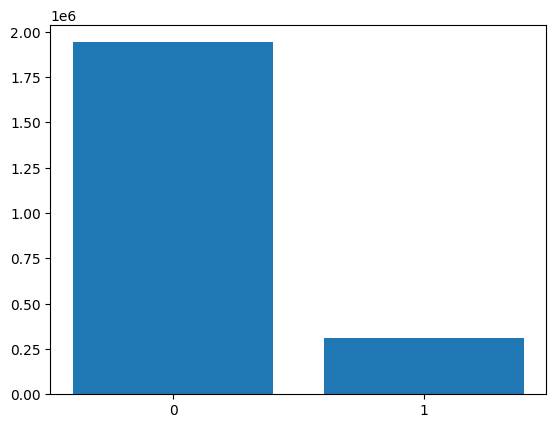

In [72]:
plt.bar(['0', '1'], [df_attr[df_attr['is_black'] == 0].shape[0], df_attr[df_attr['is_black'] == 1].shape[0]])

In [ ]:
#вытащим бренд товара

In [21]:
df_attr['brand'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Бренд"][0] if "Бренд" in x else None)

In [22]:
df_attr['brand']

0          Funny Ducks
1           Нет бренда
2              Vervaco
3                 Prym
4              Оригами
              ...     
2252564     Нет бренда
2252565           None
2252566          Daiwa
2252567           None
2252568     Нет бренда
Name: brand, Length: 2252569, dtype: object

In [23]:
#Самый частый бренд
df_attr['brand'].value_counts()

brand
Нет бренда        326596
PATRON             18131
SkySleep           12848
LYNXauto           10690
SLEEP A LOT         8777
                   ...  
COMANDIR               1
BSE                    1
Минерал Ресурс         1
Fishing time           1
ADaiY                  1
Name: count, Length: 57885, dtype: int64

In [81]:
temp = df_attr['brand'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Нет бренда'),
  Text(1, 0, 'PATRON'),
  Text(2, 0, 'SkySleep'),
  Text(3, 0, 'LYNXauto'),
  Text(4, 0, 'SLEEP A LOT'),
  Text(5, 0, 'Лига Диванов'),
  Text(6, 0, 'Febest'),
  Text(7, 0, 'BeLOC'),
  Text(8, 0, 'Grand Cadeau'),
  Text(9, 0, 'Casio')])

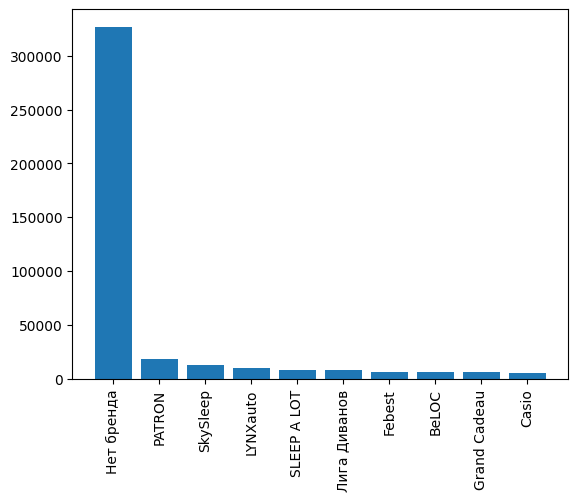

In [87]:
plt.bar(list(temp.index)[:10], list(temp.values)[:10])
plt.xticks(rotation=90)

In [ ]:
#Получим фичу количества товаров в упаковке

In [24]:
df_attr['count_in_pack'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Количество в упаковке, шт"][0] if "Количество в упаковке, шт" in x else None)

In [25]:
df_attr['count_in_pack']

0          None
1             1
2          None
3          None
4          None
           ... 
2252564    None
2252565    None
2252566    None
2252567    None
2252568    None
Name: count_in_pack, Length: 2252569, dtype: object

In [29]:
df_attr['count_in_pack'].value_counts()

count_in_pack
1                                          71228
2                                           7171
5                                           5822
10                                          5654
3                                           4131
                                           ...  
Лента 1.8см х 11м бумажная фуксия (1шт)        1
996                                            1
440                                            1
216                                            1
1182                                           1
Name: count, Length: 275, dtype: int64

In [93]:
def func(x):
    try:
        return int(x)
    except:
        return 0
df_attr['count_in_pack'] = df_attr['count_in_pack'].fillna(0).apply(func).astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x22a7dcf32b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a7dcf37f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a7dcf3010>],
 'medians': [<matplotlib.lines.Line2D at 0x22a7dcf3d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a7dcf3fd0>],
 'means': []}

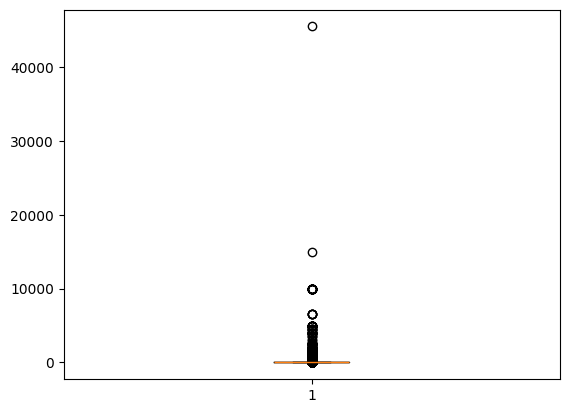

In [94]:
plt.boxplot(df_attr['count_in_pack'])

In [ ]:
#посчитаем квантили

In [98]:
df_attr['count_in_pack'].quantile(q=0.75)

0.0

In [99]:
df_attr['count_in_pack'].quantile(q=0.5)

0.0

In [100]:
df_attr['count_in_pack'].quantile(q=0.25)

0.0

In [102]:
df_attr['count_in_pack'].quantile(q=0.95)

1.0

In [103]:
df_attr['count_in_pack'].mean()

0.816852225170461

In [104]:
df_attr['count_in_pack'].max()

45500

In [105]:
df_attr['count_in_pack'].min()

-1

In [106]:
df_attr['count_in_pack'].median()

0.0

In [ ]:
#Вытащим страны-производители

In [31]:
df_attr['country'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Страна-изготовитель"][0] if "Страна-изготовитель" in x else None)

In [32]:
df_attr['country']

0             Китай
1              None
2           Бельгия
3          Германия
4            Россия
             ...   
2252564       Китай
2252565        None
2252566        None
2252567        None
2252568      Россия
Name: country, Length: 2252569, dtype: object

In [33]:
df_attr['country'].value_counts()

country
Китай                728461
Россия               673771
Италия                41066
Германия              38273
Турция                34102
                      ...  
Никарагуа                 1
Мозамбик                  1
Антигуа и Барбуда         1
Гвинейская Р-ка           1
Венесуэла                 1
Name: count, Length: 178, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Китай'),
  Text(1, 0, 'Россия'),
  Text(2, 0, 'Италия'),
  Text(3, 0, 'Германия'),
  Text(4, 0, 'Турция'),
  Text(5, 0, 'Япония'),
  Text(6, 0, 'Беларусь'),
  Text(7, 0, 'США'),
  Text(8, 0, 'Вьетнам'),
  Text(9, 0, 'Польша')])

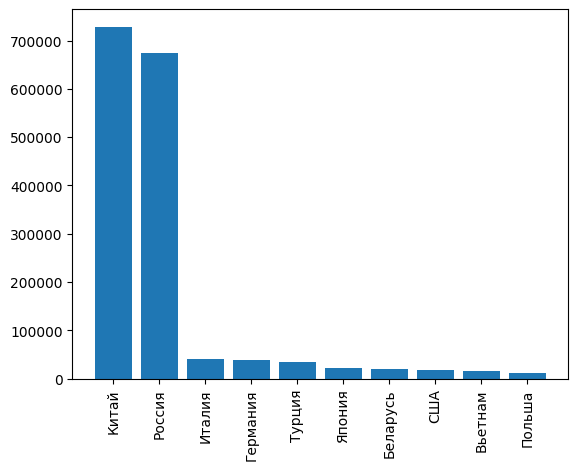

In [107]:
temp = df_attr['country'].value_counts()
plt.bar(list(temp.index)[:10], list(temp.values)[:10])
plt.xticks(rotation=90)

In [34]:
df_attr['weight'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Вес товара, г"][0] if "Вес товара, г" in x else None)

In [38]:
df_attr['weight'].value_counts()

weight
100                        17532
50                         15626
500                        14334
1000                       12376
200                        12335
                           ...  
44053                          1
18112                          1
40001                          1
50450                          1
светодиодный светильник        1
Name: count, Length: 11312, dtype: int64

In [108]:
df_attr['weight'] = df_attr['weight'].apply(func)

{'whiskers': [<matplotlib.lines.Line2D at 0x22b5222d660>,
 'caps': [<matplotlib.lines.Line2D at 0x22b5222dba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b5222d3c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b5222e0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b5222e380>],
 'means': []}

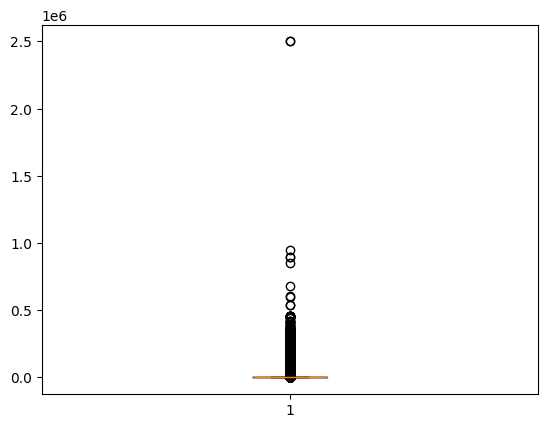

In [109]:
plt.boxplot(df_attr['weight'])

In [110]:
df_attr['weight'].quantile(q=0.75)

0.0

In [111]:
df_attr['weight'].quantile(q=0.5)

0.0

In [112]:
df_attr['weight'].quantile(q=0.25)

0.0

In [113]:
df_attr['weight'].quantile(q=0.95)

5000.0

In [114]:
df_attr['weight'].max()

2500000

In [115]:
df_attr['weight'].min()

0

In [116]:
df_attr['weight'].mean()

1812.4886696034616

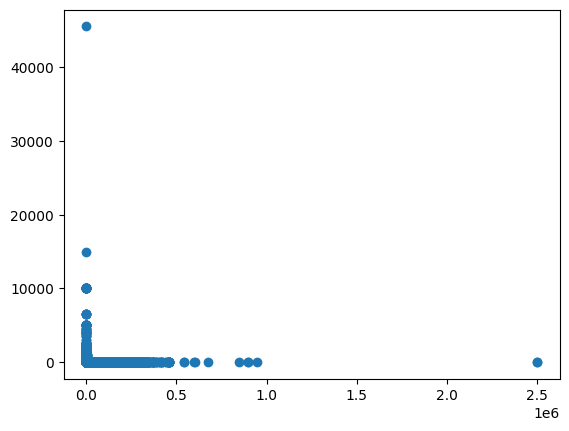

In [117]:
plt.scatter(df_attr['weight'], df_attr['count_in_pack'])

In [119]:
df_attr['material'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Материал"][0] if "Материал" in x else None)

In [40]:
df_attr['material']

0          ПВХ пластизоль
1                   Акрил
2                    None
3                    None
4                  Бумага
                ...      
2252564              None
2252565              None
2252566              None
2252567              None
2252568            Металл
Name: material, Length: 2252569, dtype: object

In [41]:
df_attr['material'].value_counts()

material
Полиэстер           47023
Пластик             45555
Хлопок              43537
Натуральная кожа    39568
Металл              30761
                    ...  
Тесто                   1
Пенакрил                1
Thinsulate              1
Ткань Alma              1
Босс                    1
Name: count, Length: 1012, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Полиэстер'),
  Text(1, 0, 'Пластик'),
  Text(2, 0, 'Хлопок'),
  Text(3, 0, 'Натуральная кожа'),
  Text(4, 0, 'Металл'),
  Text(5, 0, 'ABS пластик'),
  Text(6, 0, 'Искусственная кожа'),
  Text(7, 0, 'EVA'),
  Text(8, 0, 'Керамика'),
  Text(9, 0, 'Полиэфирное волокно')])

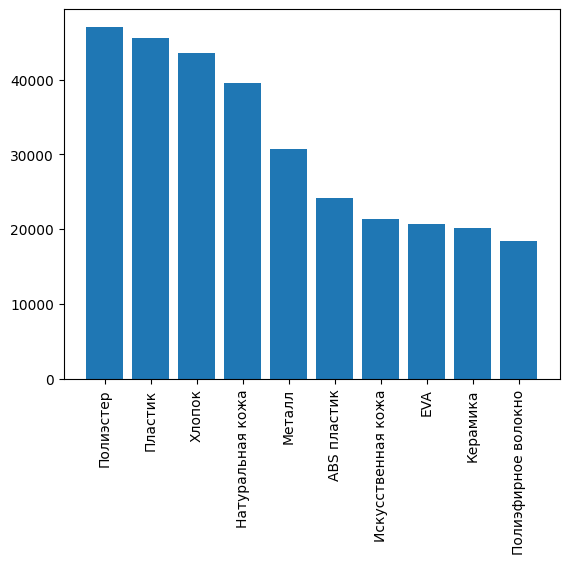

In [120]:
temp = df_attr['material'].value_counts()
plt.bar(list(temp.index)[:10], list(temp.values)[:10])
plt.xticks(rotation=90)

In [42]:
df_attr['type'] = df_attr['characteristic_attributes_mapping'].apply(lambda x: x["Тип"][0] if "Тип" in x else None)

In [43]:
df_attr['type']

0                     Игрушка для ванной
1                                 Стразы
2                    Набор для вышивания
3                                 Тесьма
4                        Настольная игра
                       ...              
2252564                   Электросамокат
2252565                             None
2252566    Монофильная леска для рыбалки
2252567                             None
2252568                  Фигурка садовая
Name: type, Length: 2252569, dtype: object

In [44]:
df_attr['type'].value_counts()

type
Матрас                   37694
Очки для чтения          21449
Очки для дали            19466
Кружка                   18377
Корм сухой               18361
                         ...  
Модуль для ресепшена         1
Пружина сцепления            1
Гель для физиотерапии        1
Зерносмесь                   1
Подкладки на домкрат         1
Name: count, Length: 10735, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Матрас'),
  Text(1, 0, 'Очки для чтения'),
  Text(2, 0, 'Очки для дали'),
  Text(3, 0, 'Кружка'),
  Text(4, 0, 'Корм сухой'),
  Text(5, 0, 'Футболка'),
  Text(6, 0, 'Вибратор'),
  Text(7, 0, 'Часы наручные'),
  Text(8, 0, 'Браслет'),
  Text(9, 0, 'Колодки тормозные')])

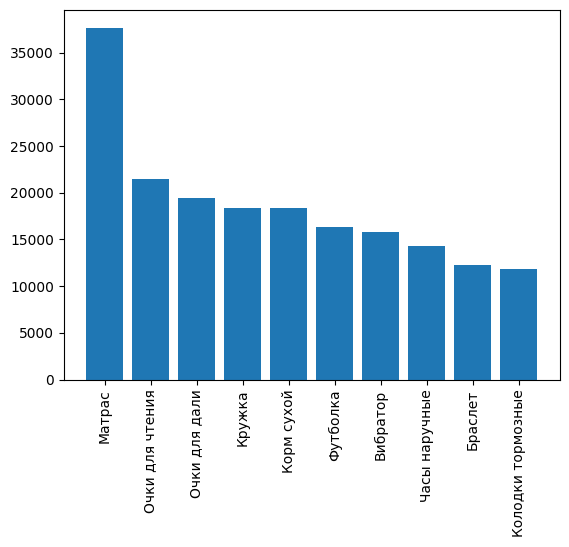

In [121]:
temp = df_attr['type'].value_counts()
plt.bar(list(temp.index)[:10], list(temp.values)[:10])
plt.xticks(rotation=90)